Tan Minh Pham A01215507

In [600]:
# Import pandas 
import pandas as pd
 
# Read the dataset using read_csv method
df = pd.read_csv("Advertising.csv")
 
# See the top-5 records in the data
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [601]:
# Independent variables or Features
X = df[['TV', 'Radio', 'Newspaper']] 
 
# Dependent or Target variable
y = df.Sales 


In [602]:
# Import train_test_split function from 
from sklearn.model_selection import train_test_split
 
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [603]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
 
# Create linear regression model
lin_reg = LinearRegression()
 
# Fit the linear regression model
lin_reg.fit(X_train, y_train)
 
# Predict the values given test set
predictions = lin_reg.predict(X_test)

# Print the intercept and coefficients
print(lin_reg.intercept_)
print(lin_reg.coef_)

2.89257005115115
[0.04416235 0.19900368 0.00116268]


In [604]:
# Import the required libraries
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_test, predictions))

Mean Absolute Error(MAE): 1.3000320919235444
Mean Squared Error(MSE): 4.012497522917095
Root Mean Squared Error(RMSE): 2.0031219440955397
R2-Square: 0.8576396745320894


### Q1. Using the above model, what is the expected values of Sales given that: TV= 190, Radio=11, Newspaper=60


In [605]:
# Given values
TV = 190
Radio = 11
Newspaper = 60


# Create a new instance of the LinearRegression model
model = LinearRegression()

# Manually set the coefficients and intercept of the model
model.intercept_ = lin_reg.intercept_
model.coef_ = np.array(lin_reg.coef_)

# Calculate expected sales
Sales = model.predict(np.array([[TV, Radio, Newspaper]]))
print("Expected Sales:", Sales[0])

Expected Sales: 13.542217089053098


### Q2. Build a linear regression model for the Salaries.csv data set
### Q3. Print the model coefficients
### Q4. Draw a scatter plot for Salary vs Years of Experience, and on the same chart plot Predicted Salary vs Years of Experience 
### Q5. What's the predicted salary for a person with 12 years of experience
### Q6. What's is RSME for the model? What does that mean?

In [606]:
# Q2. Build a linear regression model for the Salaries.csv data set
# Read the dataset using read_csv method
df = pd.read_csv("Salaries.csv")

# See the top-5 records in the data
df.head()

# Independent variables or Features
X = df[['YearsExperience']] 

# Dependent or Target variable
y = df.Salary 

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Create linear regression model
lin_reg = LinearRegression()

# Fit the linear regression model
lin_reg.fit(X_train, y_train)

# Predict the values given test set
predictions = lin_reg.predict(X_test)

# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions))


Mean Absolute Error(MAE): 3508.5455930660555


In [607]:
# Q3. Print the model coefficients
print(lin_reg.coef_)

[9379.71049195]


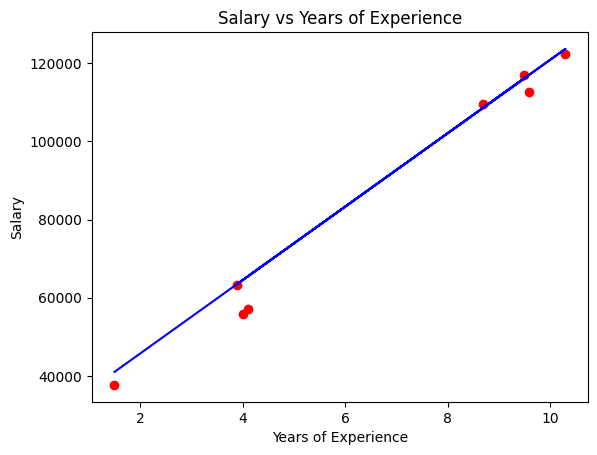

In [608]:
# Q4. Draw a scatter plot for Salary vs Years of Experience, and on the same chart plot Predicted Salary vs Years of Experience
import matplotlib.pyplot as plt
# Scatter plot for actual Salary vs Years of Experience
plt.scatter(X_test['YearsExperience'], y_test, color = 'red')

# Plot for Predicted Salary vs Years of Experience
plt.plot(X_test['YearsExperience'], predictions, color = 'blue')

# Setting labels for the plot
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Display the plot
plt.show()

In [609]:
# Q5. What's the predicted salary for a person with 12 years of experience

# Given values
YearsExperience = 12

# Create a new instance of the LinearRegression model
model = LinearRegression()

# Manually set the coefficients and intercept of the model
model.intercept_ = lin_reg.intercept_
model.coef_ = np.array(lin_reg.coef_)

# Calculate expected sales
Salary = model.predict(np.array([[YearsExperience]]))
print("Expected Salary:", Salary[0])

Expected Salary: 139543.21722008943


In [610]:
# Q6. What's is RSME for the model? What does that mean?
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions)))

# This means that on average, the model’s predictions are approximately 4733.70 units (in the unit of the target variable, which is ‘Salary’ in this case) away from the actual values. This gives you an idea about how well the model is performing by showing how close the predicted values are to the actual values. If the ‘Salary’ is in dollars, for example, this means the model’s predictions are off by about $4733.70 on average.

Root Mean Squared Error(RMSE): 4733.70258289858


### Logistic Regression

In [611]:
# Import libraries
import pandas as pd

# read the dataset
diabetes = pd.read_csv("diabetes.csv")

# Show top 5-records
diabetes.head()

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

In [612]:
# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label

# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [613]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # for performance evaluation
 
# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)
print(abs(predictions - target_test))

 
# Assess model performance using accuracy measure
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(target_test, predictions)
print (cnf_matrix)


print("Accuracy:",metrics.accuracy_score(target_test, predictions))

print ("F1: ", metrics.f1_score(target_test, predictions, average='binary'))


285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     0
214    1
Name: label, Length: 231, dtype: int64
[[132  14]
 [ 36  49]]
Accuracy: 0.7835497835497836
F1:  0.6621621621621621


### Q7. Given these numbers, check if it's likely that the person will get diabetes
### {'pregnant': [7], 'insulin': [180], 'bmi': [35], 'age': [34], 'glucose': [130], 'bp': [70], 'pedigree': [0.6]}

### Q8. Change the age to 35, check if it's likely that the person will get diabetes
### Q9. Given the LoanPayback data set, build a logistic regression model

### Q10. Is it likely that a student with income 14000 will payback a 5000 loan?

In [614]:
### Q7. Given these numbers, check if it's likely that the person will get diabetes
### {'pregnant': [7], 'insulin': [180], 'bmi': [35], 'age': [34], 'glucose': [130], 'bp': [70], 'pedigree': [0.6]}

# Given numbers
person = {'pregnant': [7], 'insulin': [180], 'bmi': [35], 'age': [34], 'glucose': [130], 'bp': [70], 'pedigree': [0.6]}

# Convert to DataFrame
person_df = pd.DataFrame.from_dict(person)

# Use the trained model to predict probabilities
person_proba = logreg.predict_proba(person_df)

print(f"{person_proba[0][0]*100}% chance of not having diabetes.")
print(f"{person_proba[0][1]*100}% chance of having diabetes.")

if person_proba[0][0]<person_proba[0][1]:
  print("The person is likely to have diabetes.")
else :
  print("The person is not likely to have diabetes.")

50.21406762687325% chance of not having diabetes.
49.78593237312675% chance of having diabetes.
The person is not likely to have diabetes.


In [615]:
### Q8. Change the age to 35, check if it's likely that the person will get diabetes
# Given numbers
person = {'pregnant': [7], 'insulin': [180], 'bmi': [35], 'age': [35], 'glucose': [130], 'bp': [70], 'pedigree': [0.6]}

# Convert to DataFrame
person_df = pd.DataFrame.from_dict(person)

# Use the trained model to predict probabilities
person_proba = logreg.predict_proba(person_df)

print(f"{person_proba[0][0]*100}% chance of not having diabetes.")
print(f"{person_proba[0][1]*100}% chance of having diabetes.")

if person_proba[0][0]<person_proba[0][1]:
  print("The person is likely to have diabetes.")
else :
  print("The person is not likely to have diabetes.")

49.781458240832755% chance of not having diabetes.
50.218541759167245% chance of having diabetes.
The person is likely to have diabetes.


In [616]:
### Q9. Given the LoanPayback data set, build a logistic regression model

# read the dataset
loans = pd.read_csv("LoanPayback.csv")

# Show top 5-records
loans.head()

# split dataset in two parts: feature set and target label 
feature_set = ['Income ($000)', 'Loan Amount ($000)','State']
features = loans[feature_set] 
target = loans.Payback

# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)
print(abs(predictions - target_test))

print("Accuracy:",metrics.accuracy_score(target_test, predictions))

print ("F1: ", metrics.f1_score(target_test, predictions, average='binary'))

30    0
34    1
28    0
3     0
19    0
17    1
21    0
23    1
29    1
26    0
27    1
Name: Payback, dtype: int64
Accuracy: 0.5454545454545454
F1:  0.4444444444444445


In [617]:
### Q10. Is it likely that a student with income 14000 will payback a 5000 loan?

# Given numbers
student = {'Income ($000)': [14000],"Loan Amount ($000)":[5000],'State':[0]}

# Convert to DataFrame
student_df = pd.DataFrame.from_dict(student)

# Use the trained model to predict probabilities
student_proba = logreg.predict_proba(student_df)

print(f"{student_proba[0][0]*100}% chance that the student will not payback the loan.")
print(f"{student_proba[0][1]*100}% chance that the student will payback the loan.")

if student_proba[0][0]<student_proba[0][1]:
  print("The student will payback the loan.")
else :
  print("The student will not payback the loan.")

100.0% chance that the student will not payback the loan.
0.0% chance that the student will payback the loan.
The student will not payback the loan.
